# 高斯核函数

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

${{f}_{1}}=similarity(x,{{l}^{(1)}})=e(-\frac{{{\left\| x-{{l}^{(1)}} \right\|}^{2}}}{2{{\sigma }^{2}}})$

In [8]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * np.power(sigma, 2)))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# load data

In [12]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


# visualize data

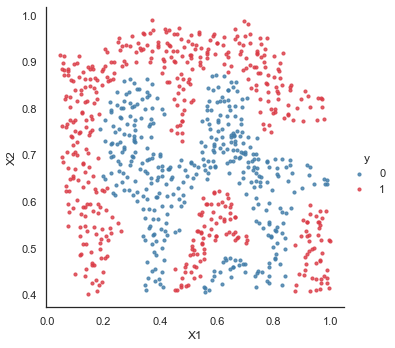

In [13]:
sns.set(context="notebook", style="white", palette=sns.diverging_palette(240, 10, n=2))
sns.lmplot(x='X1', y='X2', hue='y', data=data, 
           height=5, 
           fit_reg=False, 
           scatter_kws={"s": 10}
          )
plt.show()

# try built-in Gaussian Kernel of sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [14]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True, max_iter=100000)
svc

SVC(C=100, gamma=10, max_iter=100000, probability=True)

In [15]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

the `predict_proba` will give you ndarray (data size, class)  
so if you just want to plot the decision contour of this binary example, choose one class and plot it 

返回模型中每个类的样本概率

In [20]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])
print(predict_prob)
predict_prob = predict_prob[:, 1] # 取所有集合的第一个数据,即 y = 1 的集合
predict_prob

[[3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 ...
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]]


array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999771e-01,
       9.96177023e-01, 9.99992472e-01, 9.99999975e-01, 9.92598166e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.91238210e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.63050395e-01, 4.09132074e-01, 1.00000000e+00, 1.00000000e+00,
       9.89629731e-01, 9.99995825e-01, 9.94037973e-01, 8.92670534e-01,
       9.86538642e-01, 9.99999227e-01, 9.99999634e-01, 9.99999925e-01,
       9.99998840e-01, 9.82860314e-01, 8.54305540e-01, 9.78554930e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999999e-01, 9.99999950e-01,
       9.99995885e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

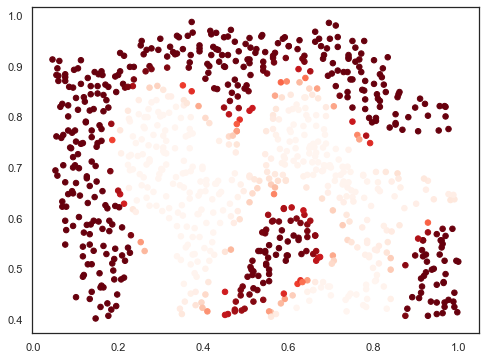

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')
plt.show()